# Australia Cenozoic paleomagnetic APWPs inverted using `bayesian_pep` approach

The code is a PyMC3 implementation of the paleomagnetic Euler pole inversion method first developed in PyMC2 within Ian Rose's mcplates package: https://github.com/ian-r-rose/mcplates

The functions are within the `bayesian_pep` library which is imported below.

In [1]:
import os, sys
import pandas as pd
import numpy as np
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns

from bayesian_pep import *

%config InlineBackend.figure_format = 'retina'

## import paleomagnetic pole compilation for Cenozoic Australia

In [2]:
Aus_ref_lat = -25.34
Aus_ref_lon = 131.03

Aus_poles = pd.read_csv('./data/Australia_poles/Australia_Cenozoic_poles.csv')
#Aus_poles = Aus_poles[0:7]

for n in range(0,len(Aus_poles)):
    Aus_poles['Paleolat'][n] = ipmag.lat_from_pole(Aus_ref_lon, Aus_ref_lat, 
                                                   Aus_poles['PLon'][n], Aus_poles['PLat'][n])
    Aus_poles['Age_error'][n] = Aus_poles['AgeNominal'][n] - Aus_poles['AgeUpper'][n]
    
Aus_poles = Aus_poles.sort_values(by='AgeNominal', ascending=0, ignore_index=1)
Aus_poles

,PoleName,Unnamed: 1,SLat,SLon,PLat,PLon,A95,K,N,PolarityZone,...,AgeNominal,AgeLower,AgeUpper,AgeInfo,AgeRef,Gaussian_2sigma,GaussianOrUniform,Q,Paleolat,Age_error
0,North Rankin 1 Drill- core,sedimentary,NaN,NaN,61.7,298.4,5.1,NaN,NaN,NaN,...,59.750,57.0,62.50,the presence of G. angulata and G. pseudomardi...,NaN,NaN,uniform,NaN,-52.649576,-2.750
1,Barrington Volcano,igneous,-31.93,151.35,74.2,306.4,5.9,NaN,16.0,NaN,...,55.500,52.0,59.00,inferred based on K-Ar dates on asscoiated lav...,NaN,NaN,uniform,NaN,-41.078934,-3.500
2,Browns Creek Formation,sedimentary,NaN,NaN,65.5,292.5,2.5,NaN,NaN,NaN,...,36.500,35.0,38.00,A Late Eocene age is indicated for the basal T...,NaN,NaN,uniform,NaN,-48.143315,-1.500
3,Hillsborough Volcano,igneous,-21.20,148.90,67.1,301.4,7.1,32.2,14.0,NaN,...,33.600,33.1,34.10,Ar-Ar k-spar date,Cohen2013a,0.5,gaussian,NaN,-47.815426,-0.500
4,Peak Range,igneous,-22.50,147.80,64.6,291.8,8.8,10.1,29.0,NaN,...,29.650,28.2,31.10,Ar-Ar dates of 30.7 +/- 0.4; 30.3 +/- 0.4; 30....,Cohen2013a,NaN,uniform,NaN,-48.820635,-1.450
5,Springsure Volcano,igneous,-24.20,148.20,70.5,300.6,9.7,13.7,18.0,NaN,...,28.100,27.8,28.40,Ar-Ar Sanidine,Cohen2013a,0.3,gaussian,NaN,-44.438602,-0.300
6,Pt. Addis Limestone,sedimentary,NaN,NaN,68.5,299.4,4.8,NaN,NaN,NaN,...,25.100,22.4,27.80,Ar-Ar and biostratigraphic,Idnurm1985a; McLaren et al. 2009a,NaN,uniform,NaN,-46.273372,-2.700
7,Tweed Volcano,igneous,NaN,NaN,77.4,306.9,5.4,15.4,48.0,NaN,...,23.900,23.1,24.70,6 Ar-Ar dates,Knesel2008a,NaN,uniform,NaN,-37.902815,-0.800
8,Main Range Volcano,igneous,NaN,NaN,76.6,271.6,6.1,23.5,25.0,NaN,...,23.450,20.2,26.70,3 Ar-Ar dates with uniform distribution extend...,Knesel2008a,NaN,uniform,NaN,-35.318194,-3.250
9,leucitite lavas,igneous,NaN,NaN,80.2,275.4,8.6,20.5,15.0,NaN,...,16.000,15.0,17.00,Ar-Ar dates with range assigned by Hansma2018,NaN,NaN,uniform,NaN,-33.146262,-1.000


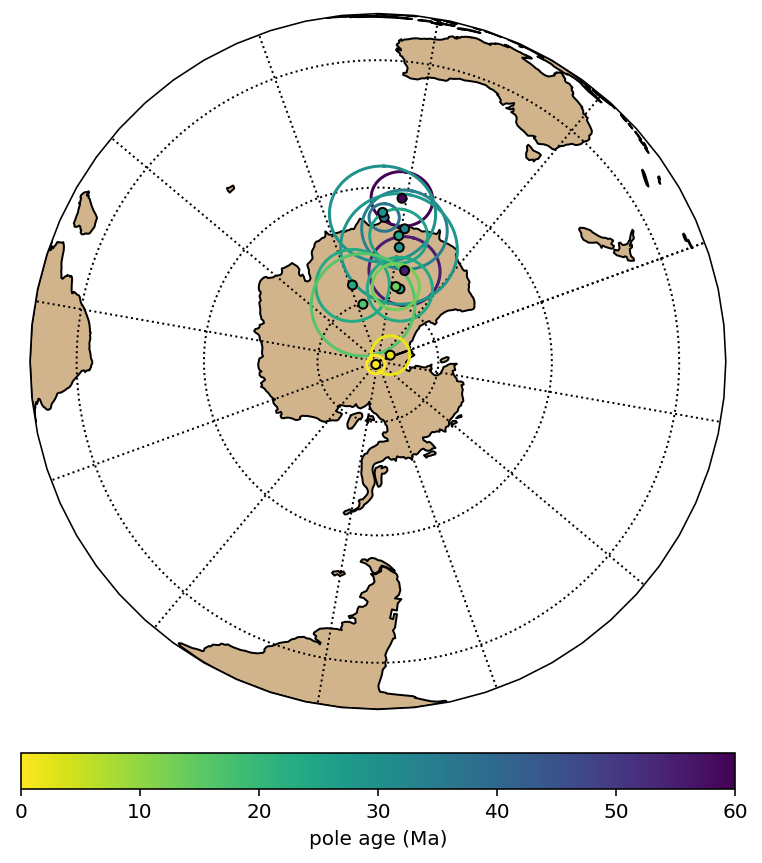

In [3]:
map_axis = ipmag.make_orthographic_map(central_longitude=110, central_latitude=-90)

ipmag.plot_poles_colorbar(map_axis,(Aus_poles['PLon']+180).tolist(),
                          (-Aus_poles['PLat']).tolist(),
                          Aus_poles['A95'].tolist(),
                          Aus_poles['AgeNominal'].tolist(),
                          0,60,colormap='viridis_r')


## import global plate model APWs based on seafloor data

The data are from Seton et al., 2012 and Matthews et al., 2016. 

- Seton, M., Müller, R. D., Zahirovic, S., Gaina, C., Torsvik, T., Shephard, G., ... & Chandler, M. (2012). Global continental and ocean basin reconstructions since 200 Ma. Earth-Science Reviews, 113(3-4), 212-270.
- Matthews, K. J., Maloney, K. T., Zahirovic, S., Williams, S. E., Seton, M., & Mueller, R. D. (2016). Global plate boundary evolution and kinematics since the late Paleozoic. Global and Planetary Change, 146, 226-250.

### Seton et al., 2012 Australia APW

In [4]:
Seton_path = np.loadtxt('./data/Australia_poles/australia_apw_seton_2012.txt')
Seton_path_sparse = Seton_path[::10]

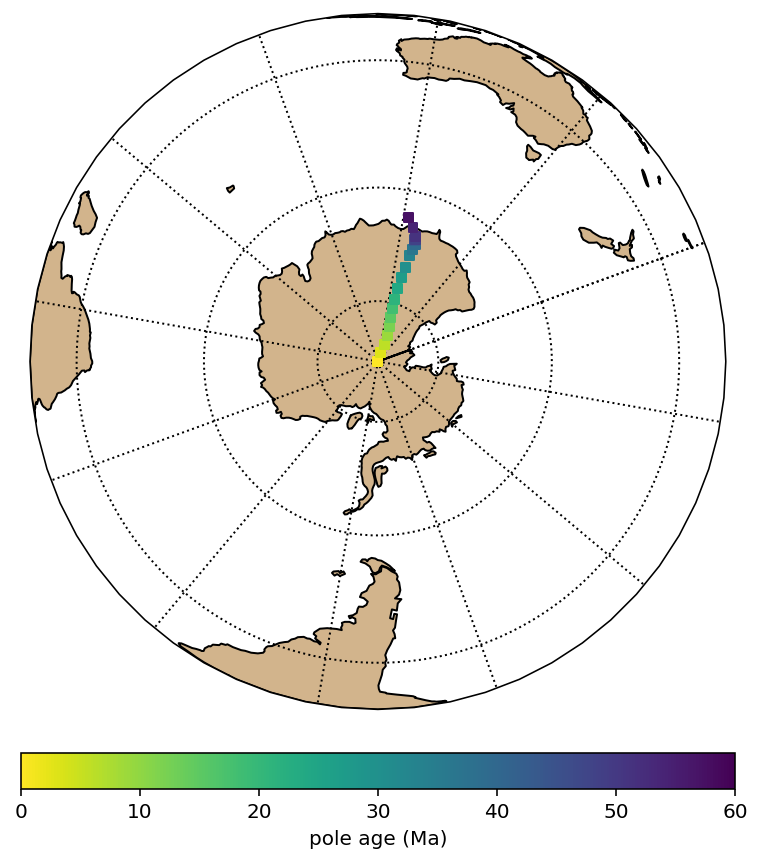

In [5]:
map_axis = ipmag.make_orthographic_map(central_longitude=110, central_latitude=-90)

ipmag.plot_poles_colorbar(map_axis,Seton_path_sparse[:,1],
                          Seton_path_sparse[:,2],
                          np.zeros(len(Seton_path_sparse)),
                          Seton_path_sparse[:,0],
                          0,60,colormap='viridis_r',
                          markersize=20,marker='s',edgecolor=None)

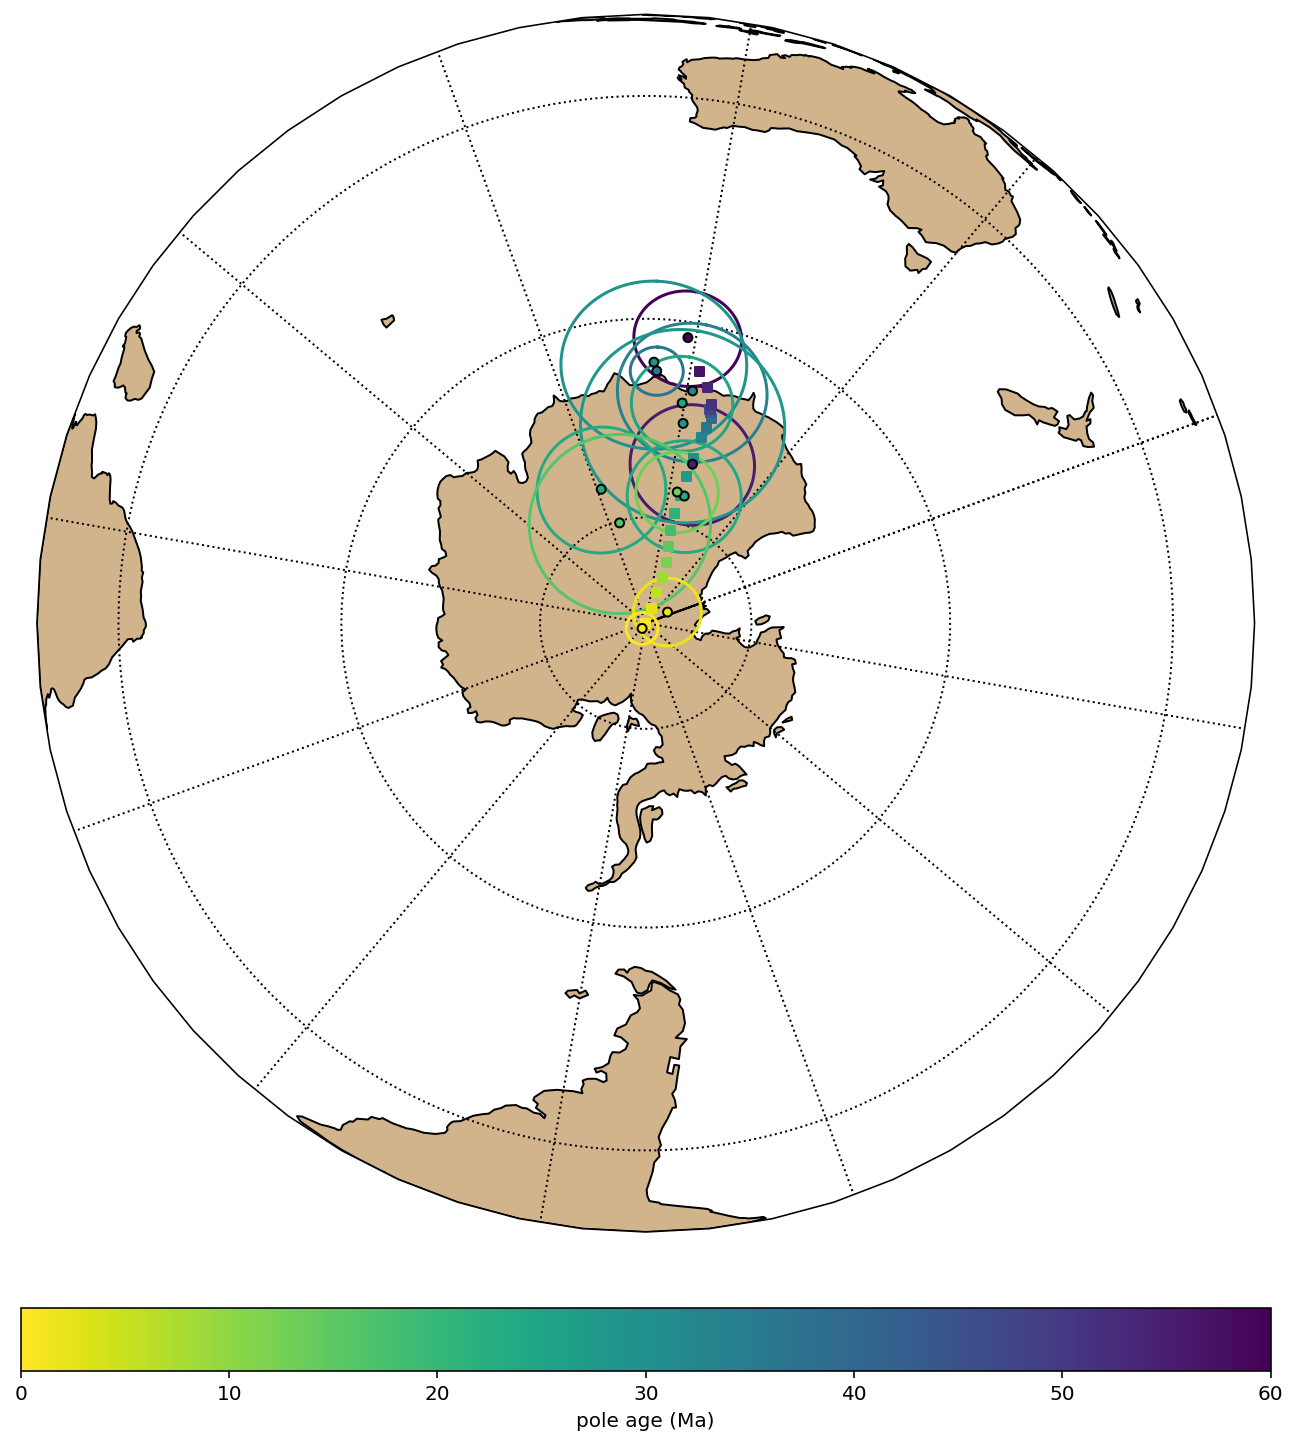

In [6]:
map_axis = ipmag.make_orthographic_map(central_longitude=110, central_latitude=-90, figsize=(14, 14))

ipmag.plot_poles_colorbar(map_axis,Seton_path_sparse[:,1],
                          Seton_path_sparse[:,2],
                          np.zeros(len(Seton_path_sparse)),
                          Seton_path_sparse[:,0],
                          0,60,colormap='viridis_r',
                          markersize=20,marker='s',edgecolor=None)

ipmag.plot_poles_colorbar(map_axis,(Aus_poles['PLon']+180).tolist(),
                          (-Aus_poles['PLat']).tolist(),
                          Aus_poles['A95'].tolist(),
                          Aus_poles['AgeNominal'].tolist(),
                          0,60,colormap='viridis_r',colorbar=False)

### Matthews et al., 2016 Australia APW

In [7]:
Matthews_path = np.loadtxt('./data/Australia_poles/australia_apw_matthews_2016.txt')[::5]

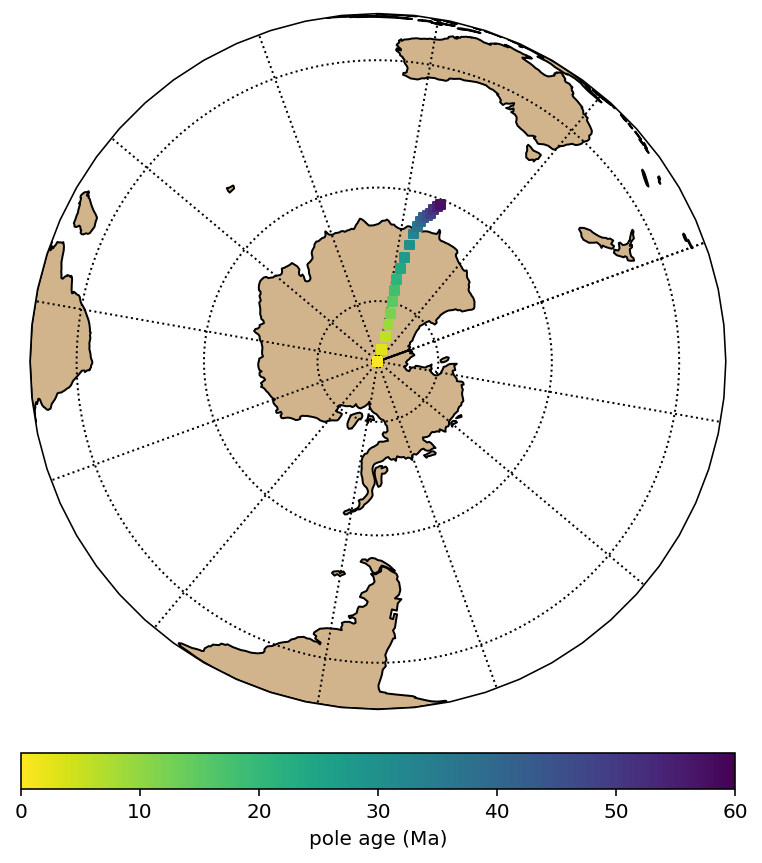

In [8]:
map_axis = ipmag.make_orthographic_map(central_longitude=110, central_latitude=-90)

ipmag.plot_poles_colorbar(map_axis,Matthews_path[:,1],
                          Matthews_path[:,2],
                          np.zeros(len(Matthews_path)),
                          Matthews_path[:,0],
                          0,60,colormap='viridis_r',
                          markersize=20,marker='s',edgecolor=None)

### combine Seton and Matthews paths

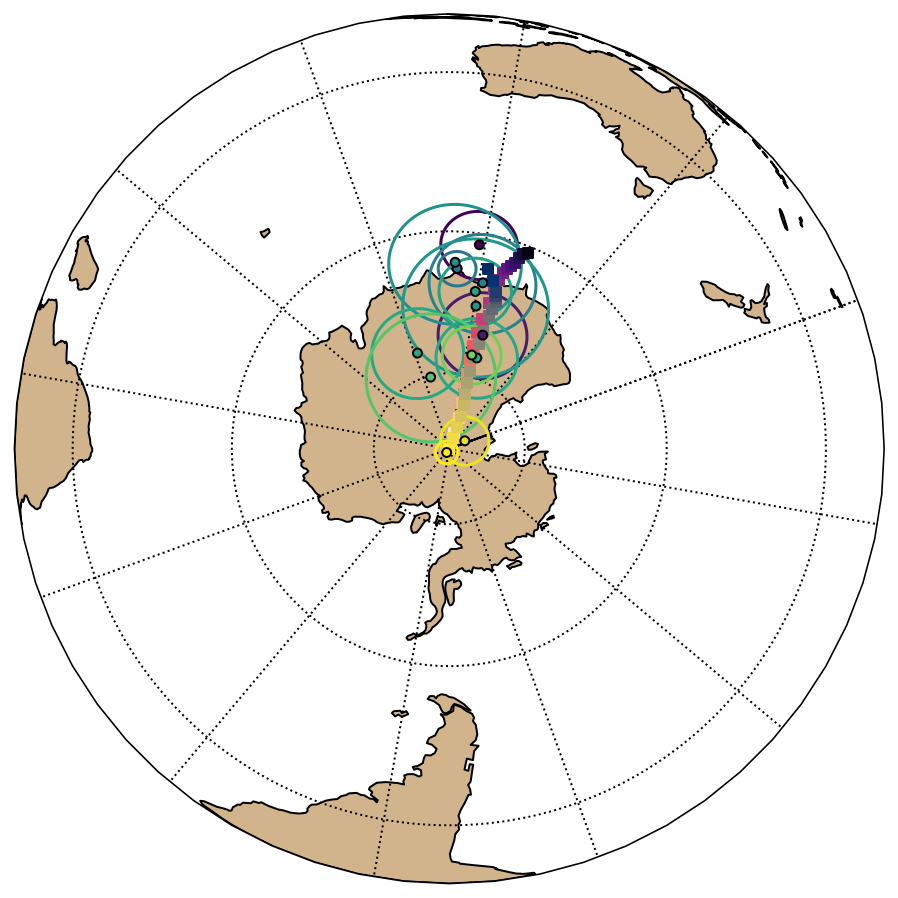

In [9]:
map_axis = ipmag.make_orthographic_map(central_longitude=110, central_latitude=-90, figsize=(8,8))


ipmag.plot_poles_colorbar(map_axis,Matthews_path[:,1],
                          Matthews_path[:,2],
                          np.zeros(len(Matthews_path)),
                          Matthews_path[:,0],
                          0,60,colormap='magma_r',
                          markersize=25,marker='s',edgecolor=None,colorbar=False)

ipmag.plot_poles_colorbar(map_axis,Seton_path_sparse[:,1],
                          Seton_path_sparse[:,2],
                          np.zeros(len(Seton_path_sparse)),
                          Seton_path_sparse[:,0],
                          0,60,colormap='cividis_r',
                          markersize=25,marker='s',edgecolor=None,colorbar=False)

ipmag.plot_poles_colorbar(map_axis,(Aus_poles['PLon']+180).tolist(),
                          (-Aus_poles['PLat']).tolist(),
                          Aus_poles['A95'].tolist(),
                          Aus_poles['AgeNominal'].tolist(),
                          0,60,colormap='viridis_r',colorbar=False)

plt.savefig('./code_output/aus_cenozoic_pole_apw.png',dpi=600,bbox_inches='tight')

In [10]:
Seton_paleolat = []
Matthews_paleolat = []


for n in range(0,len(Seton_path)):
    paleolat = ipmag.lat_from_pole(Aus_ref_lon, Aus_ref_lat,Seton_path[:,1][n],Seton_path[:,2][n])
    Seton_paleolat.append(-paleolat)
    
for n in range(0,len(Matthews_path)):
    paleolat = ipmag.lat_from_pole(Aus_ref_lon, Aus_ref_lat,Matthews_path[:,1][n],Matthews_path[:,2][n])
    Matthews_paleolat.append(-paleolat)

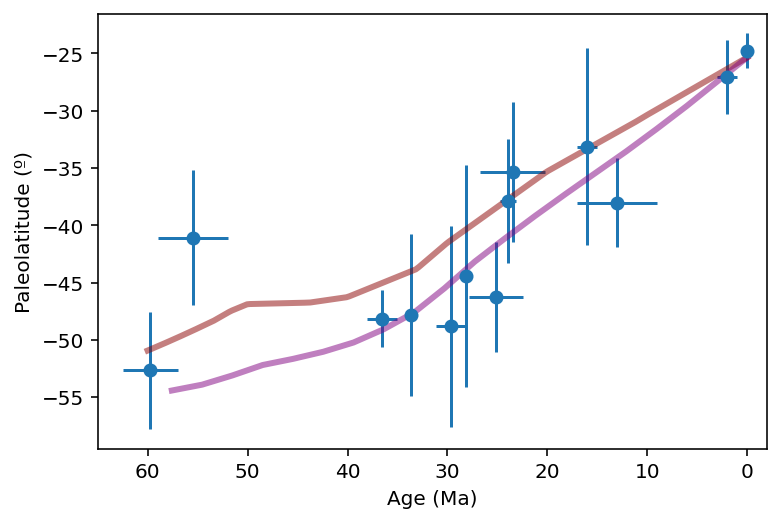

In [11]:
plt.errorbar(Aus_poles['AgeNominal'],Aus_poles['Paleolat'],yerr=Aus_poles['A95'],xerr=Aus_poles['Age_error'],fmt='o')
plt.plot(Seton_path[:,0],Seton_paleolat,color='darkred',linewidth=3,alpha=0.5)
plt.plot(Matthews_path[:,0],Matthews_paleolat,color='purple',linewidth=3,alpha=0.5)
plt.xlim(65,-2)
plt.xlabel('Age (Ma)')
plt.ylabel('Paleolatitude (º)')
plt.show()

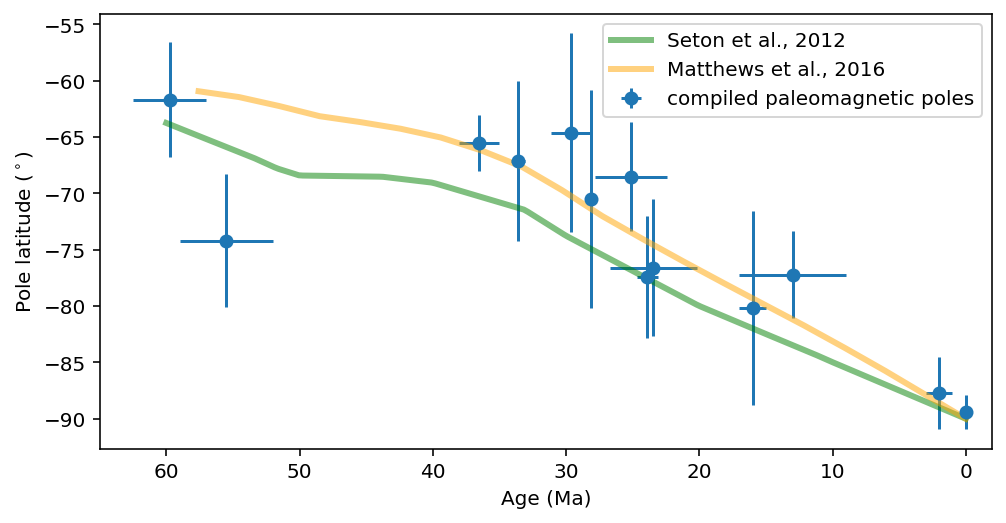

In [12]:

plt.figure(figsize=(8,4))
plt.errorbar(Aus_poles['AgeNominal'],-Aus_poles['PLat'],yerr=Aus_poles['A95'],xerr=Aus_poles['Age_error'],fmt='o', label='compiled paleomagnetic poles')
plt.plot(Seton_path[:,0],Seton_path[:,2],linewidth=3,alpha=0.5, color = 'green', label='Seton et al., 2012')
plt.plot(Matthews_path[:,0],Matthews_path[:,2], linewidth=3,alpha=0.5, color = 'orange', label='Matthews et al., 2016')

plt.xlim(65,-2)
plt.xlabel('Age (Ma)')
plt.ylabel('Pole latitude ($^\circ$)')
plt.legend()
plt.savefig('./code_output/aus_lat_rate.png', dpi=600, bbox_inches='tight')

## Apply Bayesian inversion on compiled paleomagnetic poles

In [13]:
with pm.Model() as model:

    euler_1 = Watson_Girdle('euler_1', lon_lat = [1.,1.,], k = -.1, testval = np.array([0., 0.]), shape = 2)
    rate_1 = pm.Uniform('rate_1', 0, 4) 
    euler_2 = Watson_Girdle('euler_2', lon_lat = [1.,1.,], k = -.1, testval = np.array([0., 0.]), shape = 2)
    rate_2 = pm.Uniform('rate_2', 0, 4) 
    
    start_index = Aus_poles['AgeNominal'].argmax()
    
    start_age = pm.Normal('start_pole_age', Aus_poles['AgeNominal'].max(), 0.1)
    print('starting pole age is: ', str(Aus_poles['AgeNominal'].max()))
    
    start_lon_lat = [Aus_poles['PLon'].tolist()[start_index], Aus_poles['PLat'].tolist()[start_index]]
    start_k = kappa_from_two_sigma(Aus_poles['A95'].tolist()[start_index])
    
    start = VMF('start_pole', lon_lat=start_lon_lat, 
                k = start_k, testval = np.array(start_lon_lat), shape = 2)
    
    print('starting pole lon/lat:', start_lon_lat, 'starting pole k: ',start_k)
    
    switchpoint = pm.Uniform('switchpoint', Aus_poles['AgeNominal'].min(), Aus_poles['AgeNominal'].max())
    
    for i in range(Aus_poles.shape[0]):
        
        if Aus_poles['GaussianOrUniform'][i] == 'uniform':
            age = pm.Uniform('t'+str(i), Aus_poles['AgeLower'][i], Aus_poles['AgeUpper'][i])

        else: 
            age = pm.Normal('t'+str(i), mu=Aus_poles['AgeNominal'][i], sigma = Aus_poles['Gaussian_2sigma'][i])
            mu = Aus_poles['AgeNominal'][i]
            sigma = Aus_poles['Gaussian_2sigma'][i]

        print('pole '+str(i)+' age: ',Aus_poles['AgeNominal'][i])
        
        lon_lat = pole_position_2e(start, euler_1, rate_1, euler_2, rate_2, switchpoint, start_age, age)

        observed_pole = VMF('p'+str(i), lon_lat, k = kappa_from_two_sigma(Aus_poles['A95'].tolist()[i]), 
                            observed=[Aus_poles['PLon'].tolist()[i], Aus_poles['PLat'].tolist()[i]])
        
        
#     trace_2e = pm.sample(50000, step = pm.Metropolis(), compute_convergence_checks=1, chains =1, cores=1, init='auto')

starting pole age is:  59.75
starting pole lon/lat: [298.4, 61.7] starting pole k:  753.5563244905807
pole 0 age:  59.75
pole 1 age:  55.5
pole 2 age:  36.5
pole 3 age:  33.6
pole 4 age:  29.65
pole 5 age:  28.1
pole 6 age:  25.1
pole 7 age:  23.9
pole 8 age:  23.45
pole 9 age:  16.0
pole 10 age:  13.0
pole 11 age:  2.0
pole 12 age:  0.005


In [16]:
# pm.save_trace(trace_2e, 'code_output/aus_2_euler_trace', overwrite=1)

In [14]:
trace_2e_saved = pm.load_trace('code_output/aus_2_euler_trace',model)

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


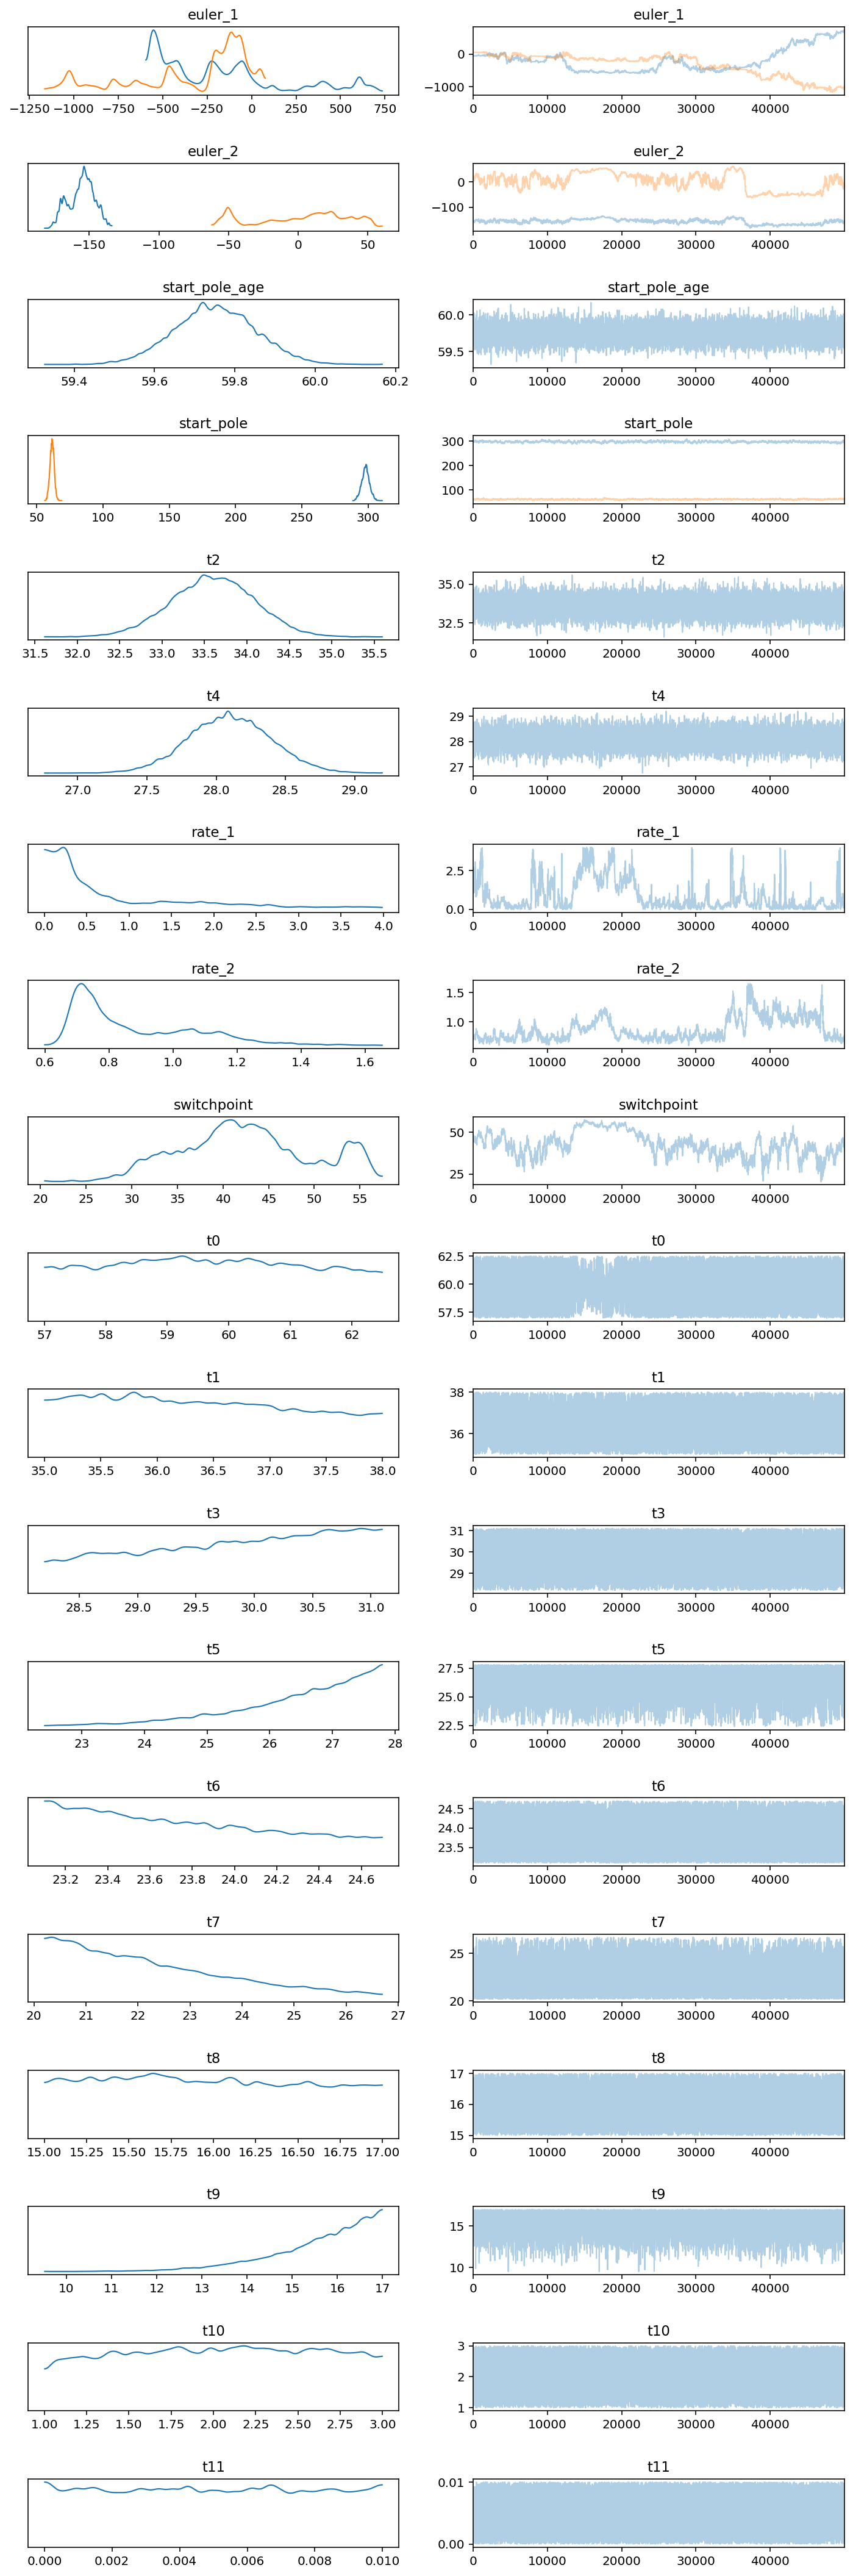

In [14]:
# plt.figure(figsize=(10, 20))
axes = pm.traceplot(trace_2e_saved, compact=1)
plt.subplots_adjust(hspace = 1 )
plt.savefig('code_output/aus_2_euler_inversion_traceplot.pdf', bbox_inches='tight')

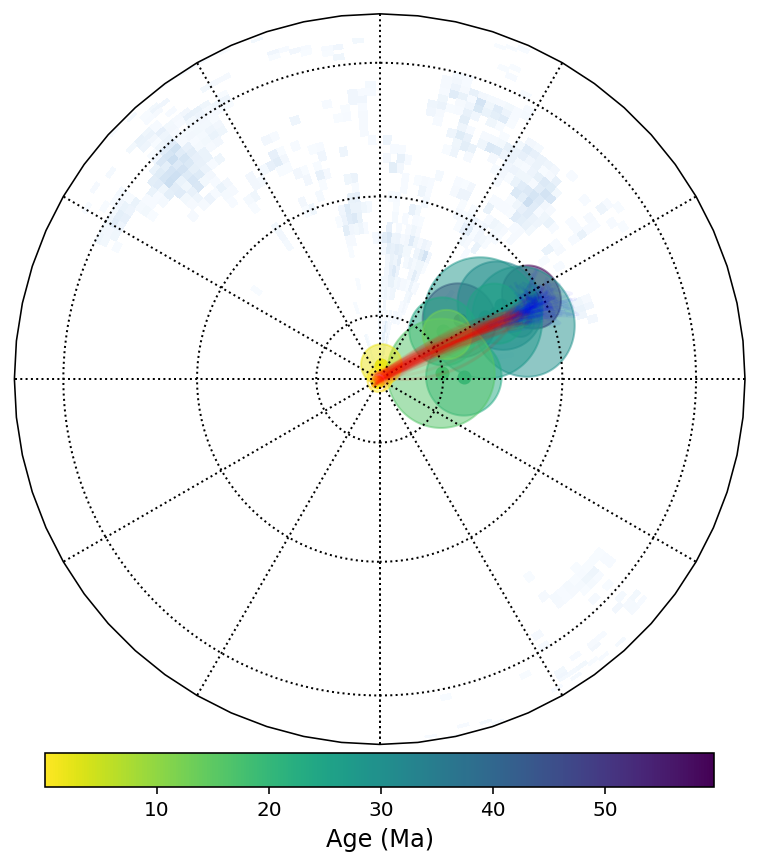

In [15]:
plot_trace_2e(trace_2e_saved, Aus_poles[['PLon', 'PLat']].to_numpy(), Aus_poles['A95'], Aus_poles['AgeNominal'].tolist(),
              central_lon=180, central_lat=90, num_paths_to_plot=100, 
                  savefig = False);

0.3368050990479666 0.00899071632373966 2.797582925962789
0.8017354372426587 0.6687074175025562 1.823633710160436


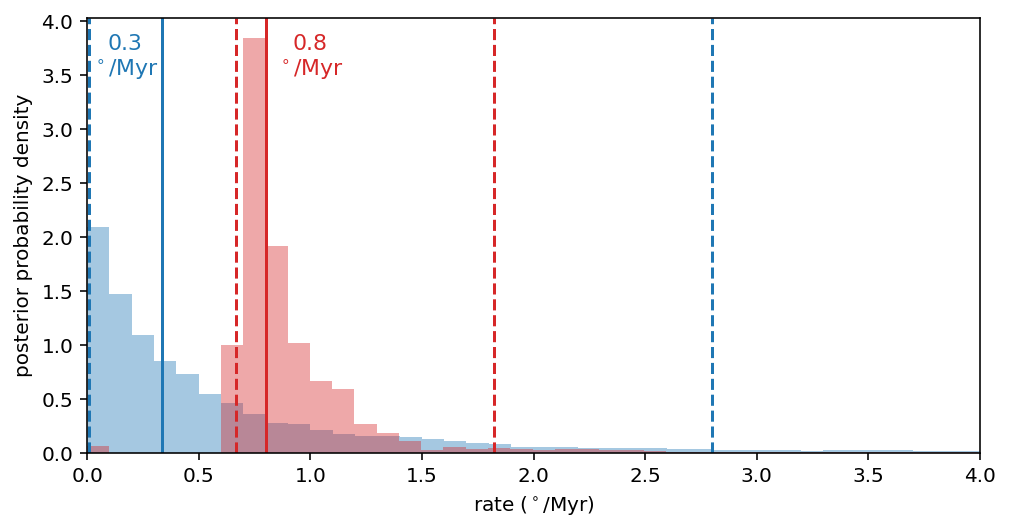

In [17]:
HPD_max_1 = np.percentile(trace_2e_saved['rate_1'],97.5)
HPD_min_1 = np.percentile(trace_2e_saved['rate_1'],2.5)
median_1 = np.median(trace_2e_saved['rate_1'])
print(median_1, HPD_min_1, HPD_max_1)

HPD_max_2 = np.percentile(trace_2e_saved['rate_2'],97.5)
HPD_min_2 = np.percentile(trace_2e_saved['rate_2'],2.5)
median_2 = np.median(trace_2e_saved['rate_2'])
print(median_2, HPD_min_2, HPD_max_2)

plt.figure(figsize=(8,4))
sns.distplot(trace_2e_saved['rate_1'],kde=False, hist_kws={'density':1}, bins=40, color = 'C0')
sns.distplot(trace_2e_saved['rate_2'],kde=False, hist_kws={'density':1}, bins=40, color = 'C3')

plt.axvline(x=median_1)
plt.axvline(x=HPD_min_1,linestyle='--')
plt.axvline(x=HPD_max_1,linestyle='--')

plt.axvline(x=median_2, color = 'C3')
plt.axvline(x=HPD_min_2,linestyle='--', color = 'C3')
plt.axvline(x=HPD_max_2,linestyle='--', color = 'C3')

plt.text(0.17, 3.5, str(round(median_1,1))+ '\n$^\circ$/Myr', horizontalalignment = 'center', color = 'C0', fontdict={'fontsize':11})
plt.text(1., 3.5, str(round(median_2,1))+ '\n$^\circ$/Myr', horizontalalignment = 'center' ,color = 'C3', fontdict={'fontsize':11})

plt.xlabel('rate ($^\circ$/Myr)')
plt.ylabel('posterior probability density')
plt.xlim(0,4)
plt.savefig('code_output/aus_2_Euler_inversion_rate.png',dpi=600,bbox_inches='tight')

In [18]:
def plot_poles_colorbar(map_axis, plons, plats, A95s, colorvalues, vmin, vmax,
                        colormap='viridis', edgecolor='k', marker='o', markersize=20,
                        alpha=1.0, colorbar=True, colorbar_label='pole age (Ma)',
                        outline='True',filled_pole=False, fill_alpha=1.0):
    color_mapping = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    colors = color_mapping.to_rgba(colorvalues).tolist()

    ipmag.plot_poles(map_axis, plons, plats, A95s,
               label='', color=colors, edgecolor=edgecolor, marker=marker,
               markersize=markersize,filled_pole=filled_pole,outline=outline,
               fill_color=colors, fill_alpha=fill_alpha)

    if colorbar == True:
        sm = plt.cm.ScalarMappable(
            cmap=colormap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        sm._A = []
        cb = plt.colorbar(sm, orientation='vertical', shrink=0.5,
                     pad=0.1)
        cb.ax.set_title(colorbar_label, fontdict={'fontsize':8}, pad=10)

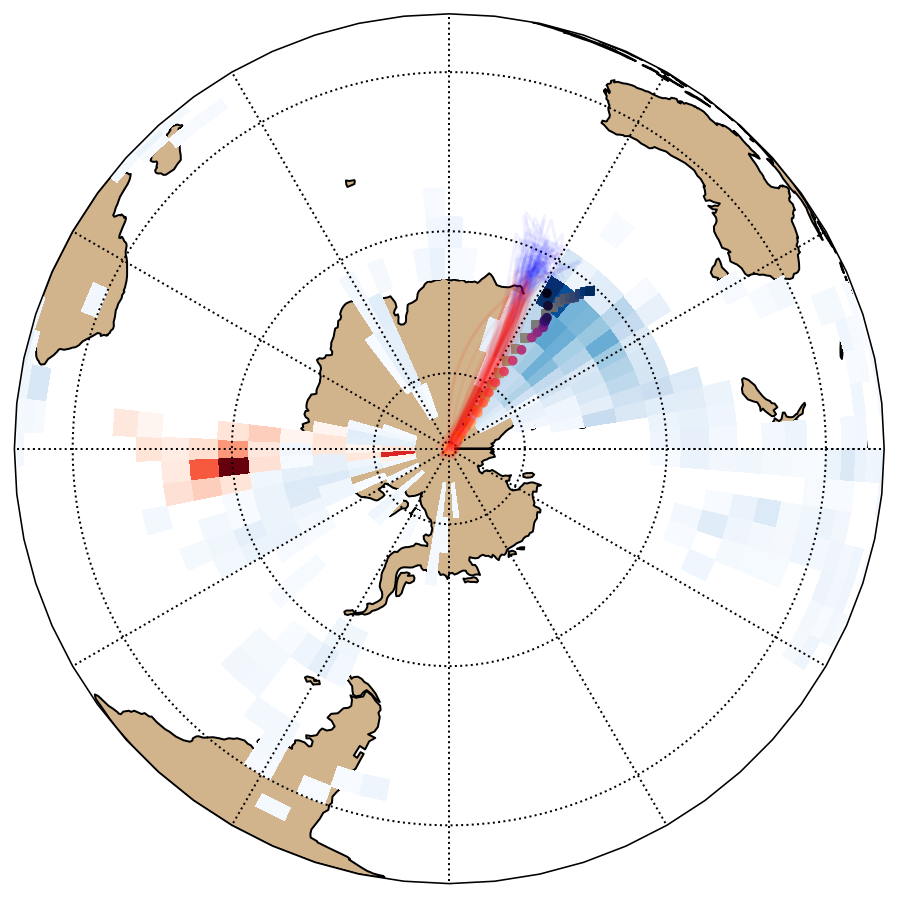

In [30]:
trace = trace_2e_saved
num_paths_to_plot = 100
central_lon = 90
central_lat = -90
A95s = Aus_poles['A95']
ages = Aus_poles['AgeNominal'].tolist()
path_resolution=100

def pole_position( start, euler_1, rate_1, euler_2, rate_2, switchpoint, start_age, age ):

        euler_pole_1 = EulerPole( euler_1[0], euler_1[1], rate_1)
        euler_pole_2 = EulerPole( euler_2[0], euler_2[1], rate_2)
        start_pole = PaleomagneticPole(start[0], start[1], age=start_age)

        if age >= switchpoint:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-age))
        else:
            start_pole.rotate( euler_pole_1, euler_pole_1.rate*(start_age-switchpoint))
            start_pole.rotate( euler_pole_2, euler_pole_2.rate*(switchpoint-age))

        lon_lat = np.ndarray.flatten(np.array([start_pole.longitude, start_pole.latitude]))

        return lon_lat

euler_1_directions = trace.euler_1
rates_1 = trace.rate_1

euler_2_directions = trace.euler_2
rates_2 = trace.rate_2

start_directions = trace.start_pole
start_ages = trace.start_pole_age
switchpoints = trace.switchpoint

interval = max([1,int(len(rates_1)/num_paths_to_plot)])

#ax = plt.axes(projection = ccrs.Orthographic(0.,30.))
ax = ipmag.make_orthographic_map(central_lon, central_lat, add_land=1, grid_lines = 1, figsize=(8,8))

plot_poles_colorbar(ax,Matthews_path[:,1],
                          Matthews_path[:,2],
                          np.zeros(len(Matthews_path)),
                          Matthews_path[:,0],
                          0,60,colormap='cividis_r',
                          markersize=15,marker='s', fill_alpha = .3, edgecolor=None, colorbar=0, colorbar_label='Matthews et al., 2016\npole ages (Ma)')

plot_poles_colorbar(ax,Seton_path_sparse[:,1],
                          Seton_path_sparse[:,2],
                          np.zeros(len(Seton_path_sparse)),
                          Seton_path_sparse[:,0],
                          0,60,colormap='magma_r',
                          markersize=15,marker='o', fill_alpha = .3, colorbar=0, edgecolor=None, colorbar_label='Seton et al., 2012\npole ages (Ma)')

plot_distributions(ax, euler_1_directions[:,0], euler_1_directions[:,1], resolution=40,cmap = 'Blues')
plot_distributions(ax, euler_2_directions[:,0], euler_2_directions[:,1], resolution=40, cmap = 'Reds')

age_list = np.linspace(ages[0], ages[-1], path_resolution)
pathlons = np.empty_like(age_list)
pathlats = np.empty_like(age_list)

for start, e1, r1, e2, r2, switch, start_age \
             in zip(start_directions[::interval], 
                    euler_1_directions[::interval], rates_1[::interval],
                    euler_2_directions[::interval], rates_2[::interval],
                    switchpoints[::interval], start_ages[::interval]):
    for i,a in enumerate(age_list):
        lon_lat = pole_position( start, e1, r1, e2, r2, switch, start_age, a)
        pathlons[i] = 180+lon_lat[0]
        pathlats[i] = -lon_lat[1]

    ax.plot(pathlons[int(switch):],pathlats[int(switch):],color='r', transform=ccrs.Geodetic(), alpha=0.05,zorder=1000)
    ax.plot(pathlons[:int(switch)],pathlats[:int(switch)],color='b', transform=ccrs.Geodetic(), alpha=0.05,zorder=1000)

# plt.savefig('code_output/aus_2_Euler_inversion.png', dpi=600, bbox_inches='tight')

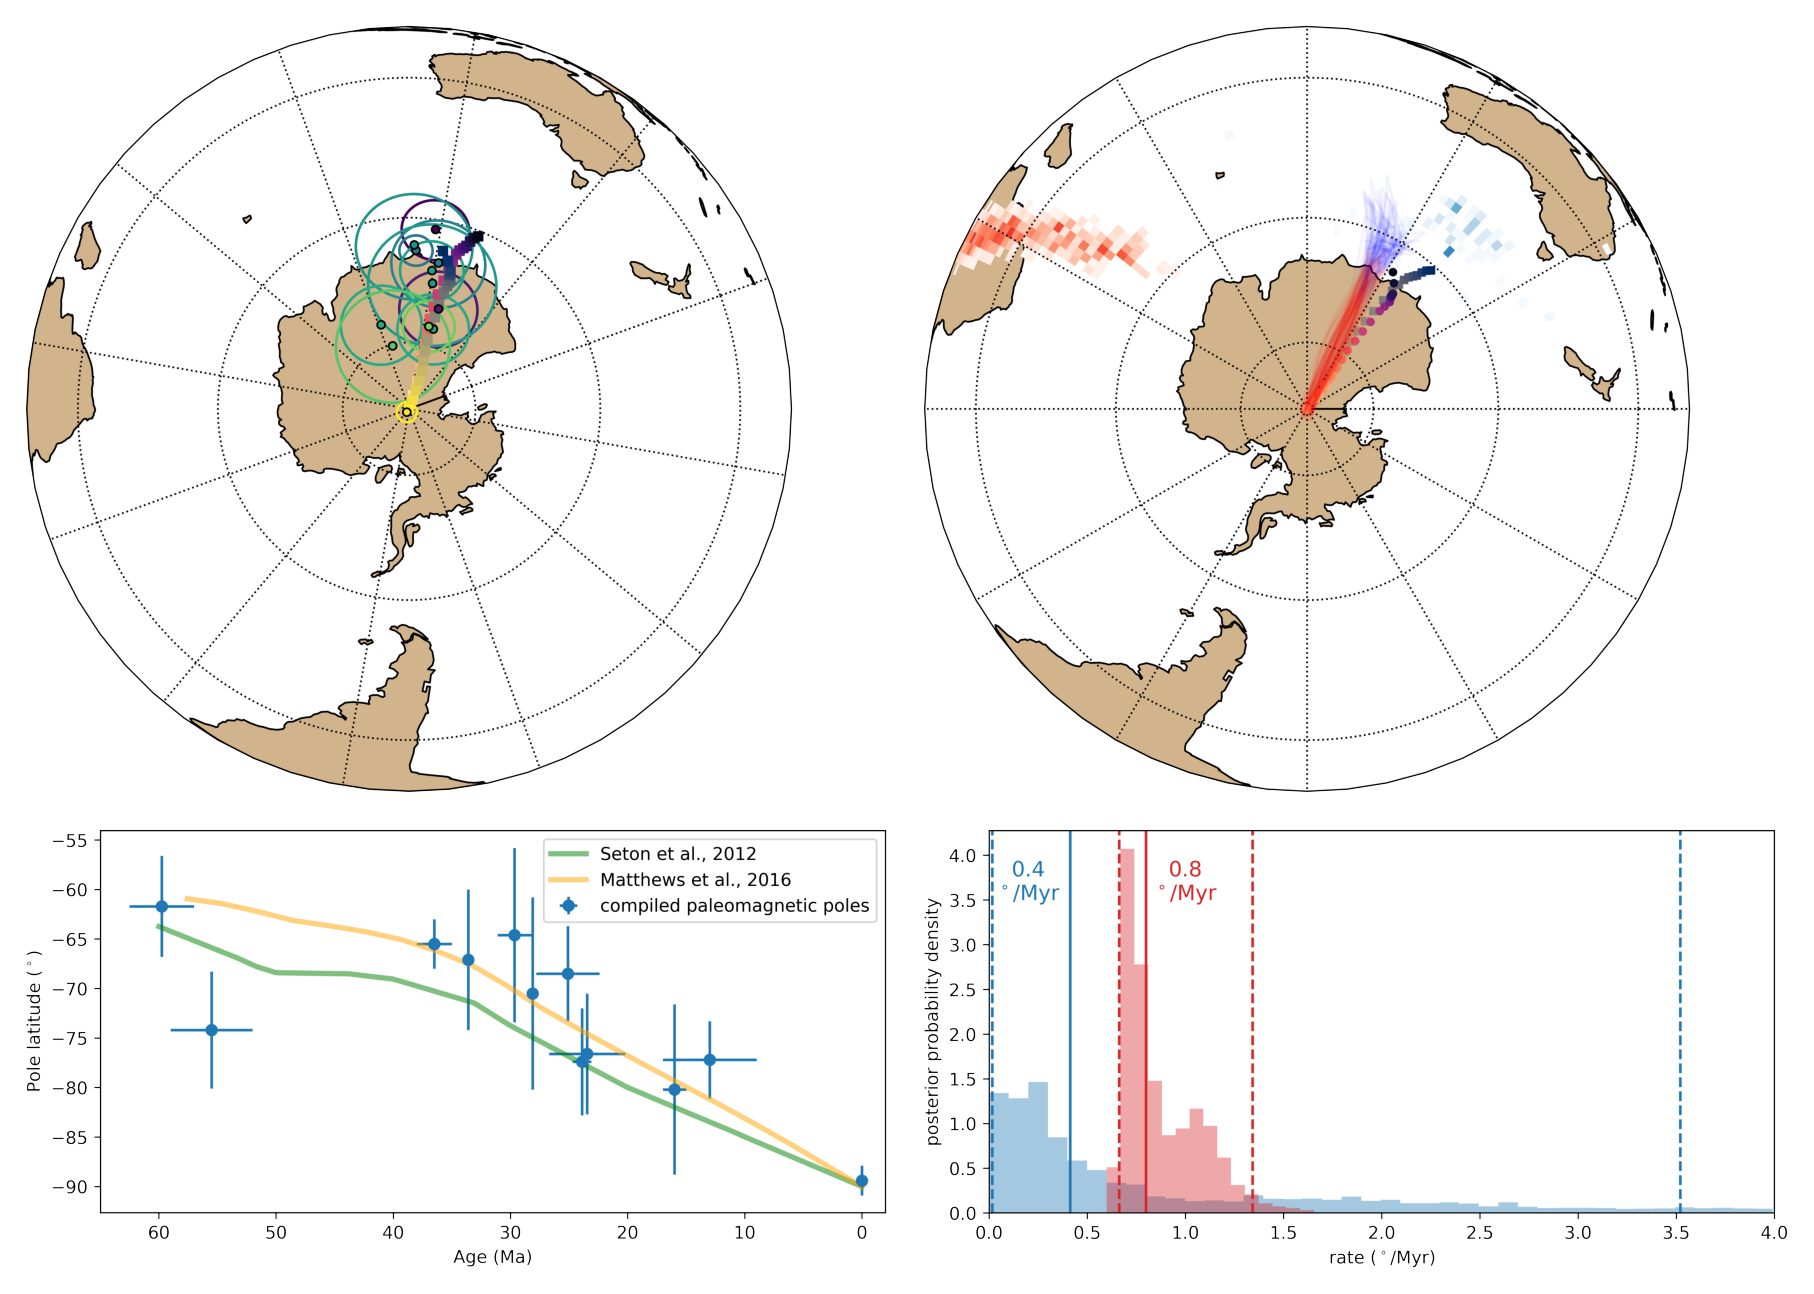

In [184]:
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.image as mpimg

previous_path_img = mpimg.imread('./code_output/aus_cenozoic_pole_apw.png')
previous_rate_img = mpimg.imread('./code_output/aus_lat_rate.png')


path_img = mpimg.imread('code_output/aus_2_Euler_inversion.png')
rate_img = mpimg.imread('code_output/aus_2_Euler_inversion_rate.png')

fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [previous_path_img, path_img,
                         previous_rate_img, rate_img]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis("off")


plt.subplots_adjust(wspace=0.2, hspace=0)

# plt.savefig('./code_output/fig_aus_inversion.png',dpi=600,bbox_inches='tight')
plt.show()